# PARAMS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pandas as pd
import joblib
import seaborn as sns

from n0_config_params import *
from n0bis_config_analysis_functions import *


debug = False



In [2]:
os.chdir(os.path.join(path_anatomy, 'nomenclature'))

nomenclature_df = pd.read_excel('Freesurfer_Parcellisation_Destrieux.xlsx')

#### fill dict with anat names
anat_loca_dict = {}
anat_lobe_dict = {}
anat_loca_list = nomenclature_df['Our correspondances'].values
anat_lobe_list_non_sorted = nomenclature_df['Lobes'].values
for i in range(len(anat_loca_list)):
    anat_loca_dict[anat_loca_list[i]] = 0
    anat_lobe_dict[anat_lobe_list_non_sorted[i]] = 0

anat_loca_dict_FR_CV = anat_loca_dict.copy()
anat_lobe_dict_FR_CV = anat_lobe_dict.copy()

anat_ROI_noselect_dict = anat_loca_dict.copy()
anat_lobe_noselect_dict = anat_lobe_dict.copy()

anat_ROI_noselect_dict_FR_CV = anat_loca_dict.copy()
anat_lobe_noselect_dict_FR_CV = anat_lobe_dict.copy()

#### for FR_CV
#sujet_i = sujet_list[0]
for sujet_i in sujet_list:

    os.chdir(os.path.join(path_anatomy, sujet_i))
    plot_loca_df = pd.read_excel(sujet_i + '_plot_loca.xlsx')

    chan_list_ieeg_csv = plot_loca_df['plot'][plot_loca_df['select'] == 1].values

    count_verif = 0

    for nchan in chan_list_ieeg_csv:

        loca_tmp = plot_loca_df['localisation_corrected'][plot_loca_df['plot'] == nchan].values[0]
        lobe_tmp = plot_loca_df['lobes_corrected'][plot_loca_df['plot'] == nchan].values[0]
        
        anat_loca_dict_FR_CV[loca_tmp] = anat_loca_dict_FR_CV[loca_tmp] + 1
        anat_lobe_dict_FR_CV[lobe_tmp] = anat_lobe_dict_FR_CV[lobe_tmp] + 1
        count_verif += 1

    #### verif count
    if count_verif != len(chan_list_ieeg_csv):
        print('ERROR : anatomical count is not correct, count != len chan_list')
        exit()


#### for whole protocole all subjects
#sujet_i = sujet_list[0]
for sujet_i in sujet_list:

    os.chdir(os.path.join(path_anatomy, sujet_i))
    plot_loca_df = pd.read_excel(sujet_i + '_plot_loca.xlsx')

    chan_list_ieeg_csv = plot_loca_df['plot'][plot_loca_df['select'] == 1].values

    count_verif = 0

    for nchan in chan_list_ieeg_csv:

        loca_tmp = plot_loca_df['localisation_corrected'][plot_loca_df['plot'] == nchan].values[0]
        lobe_tmp = plot_loca_df['lobes_corrected'][plot_loca_df['plot'] == nchan].values[0]
        
        anat_loca_dict[loca_tmp] = anat_loca_dict[loca_tmp] + 1
        anat_lobe_dict[lobe_tmp] = anat_lobe_dict[lobe_tmp] + 1
        count_verif += 1

    #### verif count
    if count_verif != len(chan_list_ieeg_csv):
        print('ERROR : anatomical count is not correct, count != len chan_list')
        exit()


#### for all plot, i. e. not included FR_CV
df_all_plot_noselect_FR_CV = pd.DataFrame(columns=plot_loca_df.columns)
for sujet_i in sujet_list:

    os.chdir(os.path.join(path_anatomy, sujet_i))
    plot_loca_df = pd.read_excel(sujet_i + '_plot_loca.xlsx')
    df_all_plot_noselect_FR_CV = pd.concat([df_all_plot_noselect_FR_CV, plot_loca_df])

df_all_plot_noselect_FR_CV.index = np.arange(df_all_plot_noselect_FR_CV.index.shape[0])

for i in df_all_plot_noselect_FR_CV.index.values:

    ROI_tmp = df_all_plot_noselect_FR_CV['localisation_corrected'][i]
    lobe_tmp = df_all_plot_noselect_FR_CV['lobes_corrected'][i]
    sujet_tmp = df_all_plot_noselect_FR_CV['subject'][i]
    
    if sujet_tmp in sujet_list:
        anat_ROI_noselect_dict_FR_CV[ROI_tmp] = anat_ROI_noselect_dict_FR_CV[ROI_tmp] + 1
        anat_lobe_noselect_dict_FR_CV[lobe_tmp] = anat_lobe_noselect_dict_FR_CV[lobe_tmp] + 1

df_data_ROI_FR_CV = {'ROI' : list(anat_loca_dict.keys()), 'ROI_Count_No_Included' : list(anat_ROI_noselect_dict_FR_CV.values()), 'ROI_Count_Included' : list(anat_loca_dict_FR_CV.values())}
df_data_Lobes_FR_CV = {'Lobes' : list(anat_lobe_dict.keys()), 'Lobes_Count_No_Included' : list(anat_lobe_noselect_dict_FR_CV.values()), 'Lobes_Count_Included' : list(anat_lobe_dict_FR_CV.values())}

df_ROI_count_FR_CV = pd.DataFrame(df_data_ROI_FR_CV)
df_lobes_count_FR_CV = pd.DataFrame(df_data_Lobes_FR_CV)


#### for all plot, i. e. not included
df_all_plot_noselect = pd.DataFrame(columns=plot_loca_df.columns)
for sujet_i in sujet_list:

    os.chdir(os.path.join(path_anatomy, sujet_i))
    plot_loca_df = pd.read_excel(sujet_i + '_plot_loca.xlsx')
    df_all_plot_noselect = pd.concat([df_all_plot_noselect, plot_loca_df])

df_all_plot_noselect.index = np.arange(df_all_plot_noselect.index.shape[0])

for i in df_all_plot_noselect.index.values:

    ROI_tmp = df_all_plot_noselect['localisation_corrected'][i]
    lobe_tmp = df_all_plot_noselect['lobes_corrected'][i]
    sujet_tmp = df_all_plot_noselect['subject'][i]
    
    if sujet_tmp in sujet_list:
        anat_ROI_noselect_dict[ROI_tmp] = anat_ROI_noselect_dict[ROI_tmp] + 1
        anat_lobe_noselect_dict[lobe_tmp] = anat_lobe_noselect_dict[lobe_tmp] + 1

df_data_ROI = {'ROI' : list(anat_loca_dict.keys()), 'ROI_Count_No_Included' : list(anat_ROI_noselect_dict.values()), 'ROI_Count_Included' : list(anat_loca_dict.values())}
df_data_Lobes = {'Lobes' : list(anat_lobe_dict.keys()), 'Lobes_Count_No_Included' : list(anat_lobe_noselect_dict.values()), 'Lobes_Count_Included' : list(anat_lobe_dict.values())}

df_ROI_count = pd.DataFrame(df_data_ROI)
df_lobes_count = pd.DataFrame(df_data_Lobes)

In [3]:
df_ROI_count.query(f"ROI_Count_Included != 0 and ROI not in ['ventricule', 'WM']")

,ROI,ROI_Count_No_Included,ROI_Count_Included
0,orbitofrontal,1,1
14,insula post,3,3
16,fusiforme,2,2
17,lingual,3,3
18,parahippocampique,5,5
20,supramarginal,1,1
24,temporal sup,33,33
25,temporal inf,32,32
26,temporal med,36,36
27,pole temporal,23,23


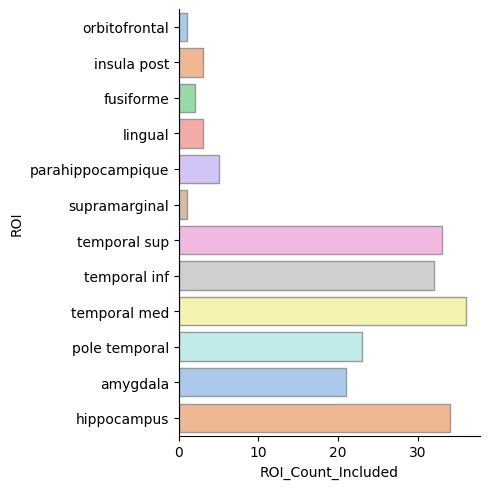

In [4]:
df_plot = df_ROI_count.query(f"ROI_Count_Included != 0 and ROI not in ['ventricule', 'WM']")
sns.catplot(data=df_plot, x="ROI_Count_Included", y="ROI", kind='bar', palette="pastel", edgecolor=".6")
plt.show()


In [5]:
total = 0
total_included = 0
total_rejected = 0

for sujet_i in sujet_list:

    os.chdir(os.path.join(path_anatomy, sujet_i))
    plot_loca_df = pd.read_excel(sujet_i + '_plot_loca.xlsx')

    total_included += plot_loca_df['select'].sum()
    total_rejected += plot_loca_df.query('select == 0').shape[0]
    total += plot_loca_df.shape[0]

print(f"total : {total}")
print(f"total_included : {total_included}")
print(f"total_rejected : {total_rejected}")
    

total : 432
total_included : 329
total_rejected : 103


In [6]:
os.chdir(os.path.join(path_anatomy, 'nomenclature'))

ROI_list = np.unique(pd.read_excel('Freesurfer_Parcellisation_Destrieux.xlsx')['Our correspondances'].values)

#### fill dict with anat names
anat_dict = {'ROI' : ROI_list}

for sujet in sujet_list:

    anat_dict[sujet] = np.zeros((ROI_list.shape[0]))

df_ROI = pd.DataFrame(anat_dict)

#### for whole protocole all subjects
#sujet = sujet_list[0]
for sujet_i, sujet in enumerate(sujet_list):

    os.chdir(os.path.join(path_anatomy, sujet))
    plot_loca_df = pd.read_excel(sujet + '_plot_loca.xlsx')

    chan_list_ieeg_csv = plot_loca_df['plot'][plot_loca_df['select'] == 1].values

    count_verif = 0

    for nchan in chan_list_ieeg_csv:

        loca_tmp = plot_loca_df['localisation_corrected'][plot_loca_df['plot'] == nchan].values[0]

        sel_i = np.where(ROI_list == loca_tmp)[0]
        df_ROI.iloc[sel_i, sujet_i+1] += 1
        
df_ROI
    

,ROI,pat_03083_1527,pat_03105_1551,pat_03128_1591,pat_03138_1601,pat_03146_1608,pat_03174_1634
0,WM,19.0,21.0,42.0,15.0,24.0,11.0
1,amygdala,4.0,3.0,6.0,3.0,2.0,3.0
2,caudate,0.0,0.0,0.0,0.0,0.0,0.0
3,choroide plexus,0.0,0.0,0.0,0.0,0.0,0.0
4,cingulaire ant caudal,0.0,0.0,0.0,0.0,0.0,0.0
5,cingulaire ant rostral,0.0,0.0,0.0,0.0,0.0,0.0
6,cingulaire post,0.0,0.0,0.0,0.0,0.0,0.0
7,cuneus,0.0,0.0,0.0,0.0,0.0,0.0
8,frontal inf,0.0,0.0,0.0,0.0,0.0,0.0
9,frontal med,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
sel_i = np.where(df_ROI.iloc[:,1:].values.sum(axis=1) != 0)[0]
df_ROI = df_ROI.iloc[sel_i,:]
df_ROI

,ROI,pat_03083_1527,pat_03105_1551,pat_03128_1591,pat_03138_1601,pat_03146_1608,pat_03174_1634
0,WM,19.0,21.0,42.0,15.0,24.0,11.0
1,amygdala,4.0,3.0,6.0,3.0,2.0,3.0
11,fusiforme,1.0,0.0,0.0,1.0,0.0,0.0
12,hippocampus,2.0,6.0,8.0,4.0,7.0,7.0
14,insula post,0.0,0.0,1.0,0.0,2.0,0.0
16,lingual,0.0,0.0,2.0,1.0,0.0,0.0
19,orbitofrontal,0.0,0.0,0.0,0.0,1.0,0.0
21,parahippocampique,2.0,1.0,1.0,0.0,1.0,0.0
27,pole temporal,4.0,4.0,0.0,7.0,3.0,5.0
32,supramarginal,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
pd.DataFrame({'ROI' : df_ROI['ROI'].values, 'count' :  df_ROI.iloc[:,1:].values.sum(axis=1)})

,ROI,count
0,WM,132.0
1,amygdala,21.0
2,fusiforme,2.0
3,hippocampus,34.0
4,insula post,3.0
5,lingual,3.0
6,orbitofrontal,1.0
7,parahippocampique,5.0
8,pole temporal,23.0
9,supramarginal,1.0


In [12]:
df_ROI_name_corrected = df_ROI.copy()
df_ROI_name_corrected = df_ROI_name_corrected.replace('insula post','posterior insula')
df_ROI_name_corrected = df_ROI_name_corrected.replace('parahippocampique','parahippocampic')
df_ROI_name_corrected = df_ROI_name_corrected.replace('temporal inf','temporal inferior')
df_ROI_name_corrected = df_ROI_name_corrected.replace('temporal med','temporal median')
df_ROI_name_corrected = df_ROI_name_corrected.replace('temporal sup','temporal superior')

In [15]:
ROI_list_plot = ['amygdala', 'hippocampus', 'posterior insula', 'parahippocampic', 'temporal inferior', 'temporal median', 'temporal superior']

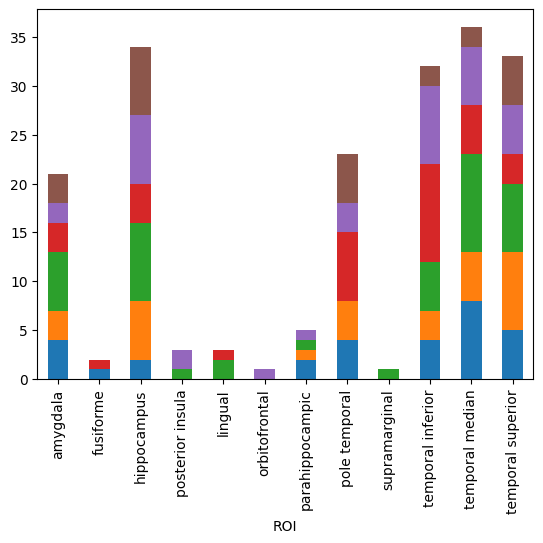

In [13]:
ax = df_ROI_name_corrected.query(f"ROI not in ['ventricule', 'WM']").set_index('ROI').plot(kind='bar', stacked=True)
ax.get_legend().remove()
plt.show()

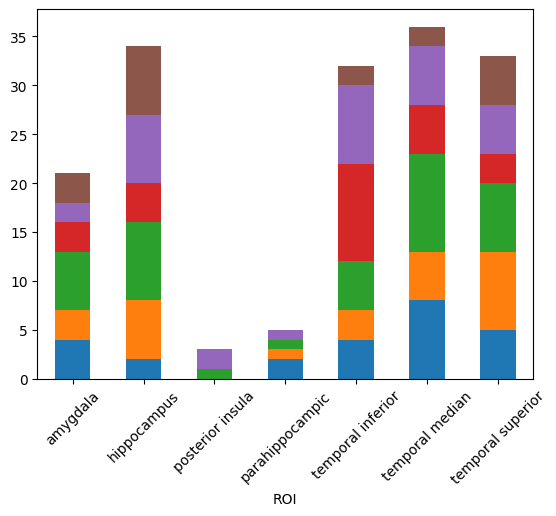

In [18]:
ax = df_ROI_name_corrected.query(f"ROI in {ROI_list_plot}").set_index('ROI').plot(kind='bar', stacked=True)
ax.get_legend().remove()
for label in ax.get_xticklabels():
  label.set_rotation(45)
#   label.set_ha('right')

plt.show()